In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')
df_submission = pd.read_csv('SampleSubmission.csv')


In [3]:
df_train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [4]:
df_test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [5]:
df_submission.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [6]:
print(df_train.shape)
print(df_test.shape)


(7205, 9)
(2061, 8)


In [7]:
df_train.dtypes

VehicleID                  object
Location                   object
Maker                      object
Model                      object
Year                       object
Colour                     object
Amount (Million Naira)    float64
Type                       object
Distance                   object
dtype: object

In [8]:
df_test.dtypes

VehicleID     object
Location      object
Maker         object
Model         object
Year          object
Colour        object
Type          object
Distance     float64
dtype: object

In [9]:
df_train['Year'] = df_train['Year'].str.replace(',', "")
df_train['Distance'] = df_train['Distance'].str.replace(',', "")

In [10]:
df_train

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.50,Nigerian Used,125000
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.20,Foreign Used,110852
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.80,Foreign Used,30000
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.60,Nigerian Used,125206
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,2018,Gray,5.70,Foreign Used,65000
7201,VHL10637,Abuja,BMW,X3,2007,White,4.00,Nigerian Used,200000
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,2010,Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,2012,Black,8.65,Foreign Used,85750


In [11]:
df_test['Year'] = df_test['Year'].str.replace(',',"")
# df_test['Distance'] = df_test['Distance'].str.replace(',',"")

In [12]:
df_test['Distance'] = df_test['Distance'].astype(str)

In [13]:
df_test.dtypes

VehicleID    object
Location     object
Maker        object
Model        object
Year         object
Colour       object
Type         object
Distance     object
dtype: object

In [14]:
df_test['Distance'] = df_test['Distance'].str.replace(',',"")

In [15]:
df_test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,2008,White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,2013,White,Foreign Used,nan
2,VHL10927,Lagos,Toyota,Highlander Limited V6,2005,Gold,Foreign Used,nan
3,VHL12909,Lagos,Toyota,Camry,2011,Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,2013,Red,Foreign Used,88862.0


In [16]:
df_train.drop(['VehicleID'], axis=1, inplace=True)
df_train.drop(['Model'], axis=1, inplace = True)

In [17]:
df_test.drop(['VehicleID'], axis=1, inplace=True)
df_test.drop(['Model'], axis = 1, inplace = True)

In [18]:
df_train.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,2011,Silver,2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,2012,Silver,3.5,Nigerian Used,125000
2,Lagos,Lexus,2010,Red,9.2,Foreign Used,110852
3,Abuja,Mercedes-Benz,2017,Blue,22.8,Foreign Used,30000
4,Ibadan,Toyota,2002,Red,2.6,Nigerian Used,125206


In [19]:
df_test.head()

,Location,Maker,Year,Colour,Type,Distance
0,Abuja,BMW,2008,White,Foreign Used,30524.0
1,Lagos,Toyota,2013,White,Foreign Used,nan
2,Lagos,Toyota,2005,Gold,Foreign Used,nan
3,Lagos,Toyota,2011,Gray,Foreign Used,166839.0
4,Lagos,Lexus,2013,Red,Foreign Used,88862.0


In [20]:
df_train['Distance'] = pd.to_numeric(df_train['Distance']) 

In [21]:
df_train.dtypes

Location                   object
Maker                      object
Year                       object
Colour                     object
Amount (Million Naira)    float64
Type                       object
Distance                  float64
dtype: object

In [22]:
df_test['Distance'] = pd.to_numeric(df_test['Distance'], errors='coerce')


In [23]:
df_test.dtypes

Location     object
Maker        object
Year         object
Colour       object
Type         object
Distance    float64
dtype: object

In [24]:
df_train.isnull().sum()

Location                     0
Maker                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [25]:
df_test.isnull().sum()

Location      0
Maker         0
Year          2
Colour        0
Type         54
Distance    676
dtype: int64

In [26]:
df_train.shape

(7205, 7)

In [27]:
df_test.shape

(2061, 6)

In [28]:
df_train.describe()

,Amount (Million Naira),Distance
count,7188.000000,4.845000e+03
mean,11.847999,1.031989e+05
std,25.318922,1.182902e+05
min,0.450000,1.000000e+00
25%,3.500000,5.235200e+04
50%,5.650000,8.083000e+04
75%,11.662500,1.175840e+05
max,456.000000,1.985400e+06


In [29]:
df_train['Year'].fillna(value=df_train['Year'].mode()[0], inplace= True )

In [30]:
df_train['Amount (Million Naira)'].fillna(value=df_train['Amount (Million Naira)'].median(), inplace=True)

In [31]:
df_train['Type'].fillna(value=df_train['Type'].mode()[0], inplace= True )

In [32]:
df_train['Distance'].fillna(value=df_train['Distance'].mean(), inplace= True )

In [33]:
df_train.isnull().sum()

Location                  0
Maker                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [34]:
df_test['Year'].fillna(value=df_test['Year'].mode()[0], inplace= True )

In [35]:
df_test['Type'].fillna(value=df_test['Type'].mode()[0], inplace= True )

In [36]:
df_test['Distance'].fillna(value=df_test['Distance'].median(), inplace= True )

In [37]:
df_test.isnull().sum()

Location    0
Maker       0
Year        0
Colour      0
Type        0
Distance    0
dtype: int64

In [38]:
duplicate_train = df_train[df_train.duplicated()]

In [39]:
duplicate_train

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
715,Lagos,Lexus,2015,Black,9.80,Foreign Used,103198.903612
1497,Abuja,Toyota,2007,Black,2.40,Nigerian Used,103198.903612
1560,Lagos,Lexus,2010,Black,9.20,Foreign Used,103198.903612
1918,Abuja,Lexus,2005,Gray,3.30,Nigerian Used,103198.903612
2107,Lagos,Toyota,2017,Gray,18.00,Foreign Used,103198.903612
2633,Lagos,Lexus,2010,White,6.00,Foreign Used,103198.903612
3164,Lagos,Mercedes-Benz,2010,Silver,7.50,Foreign Used,103198.903612
3324,Abuja,Mercedes-Benz,2009,Black,4.50,Foreign Used,103198.903612
3506,Lagos,Lexus,2009,Silver,5.40,Foreign Used,103198.903612
3867,Abuja,Mercedes-Benz,2014,Black,13.00,Foreign Used,103198.903612


In [40]:
df_train.duplicated().sum()

43

In [41]:
duplicates_test = df_test[df_test.duplicated()]

In [42]:
duplicates_test

,Location,Maker,Year,Colour,Type,Distance
204,Lagos,Toyota,2008,Silver,Foreign Used,82000.0
224,Lagos,Toyota,2011,Black,Foreign Used,82000.0
241,Abuja,Mercedes-Benz,2010,Black,Foreign Used,82000.0
271,Lagos,Mercedes-Benz,2015,White,Foreign Used,82000.0
311,Abuja,Toyota,2013,Red,Foreign Used,82000.0
...,...,...,...,...,...,...
2003,Lagos,Toyota,2011,Red,Foreign Used,82000.0
2018,Lagos,Lexus,2010,Black,Foreign Used,82000.0
2027,Lagos,Mercedes-Benz,2015,White,Foreign Used,82000.0
2033,Lagos,Lexus,2017,White,Foreign Used,82000.0


In [43]:
df_test.duplicated().sum()

155

In [44]:
df_train = df_train.drop_duplicates(keep = False)

In [45]:
df_train.duplicated().sum()

0

In [46]:
df_test = df_test.drop_duplicates(keep = False)

In [47]:
df_test.duplicated().sum()

0

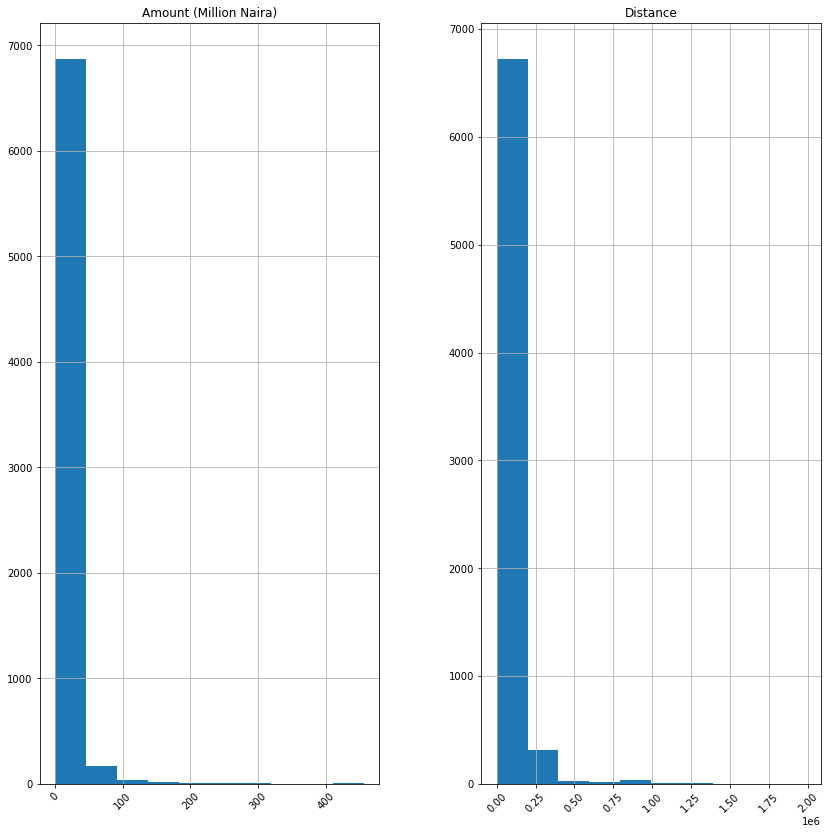

In [48]:
df_train.hist(figsize=(14,14), xrot=45)
plt.show()

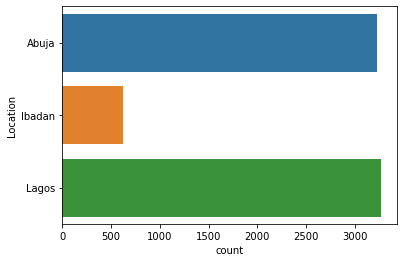

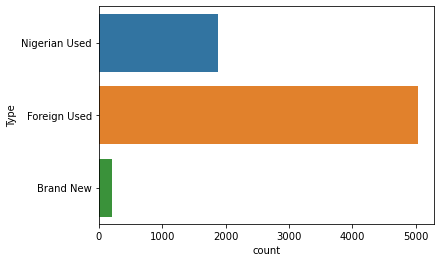

In [49]:
for column in df_train.select_dtypes(include='object'):
    if df_train[column].nunique() < 10:
        sns.countplot(y=column, data=df_train)
        plt.show()

In [50]:
df_train.dtypes

Location                   object
Maker                      object
Year                       object
Colour                     object
Amount (Million Naira)    float64
Type                       object
Distance                  float64
dtype: object

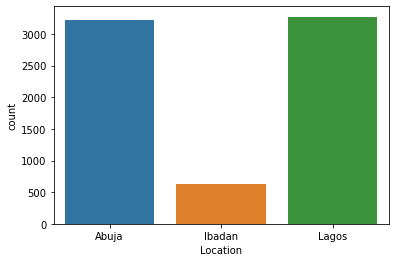

In [51]:
sns.countplot(data = df_train, x = 'Location');

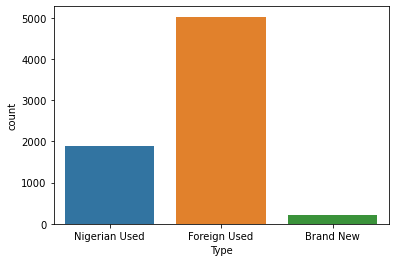

In [52]:
sns.countplot(data = df_train, x = 'Type');

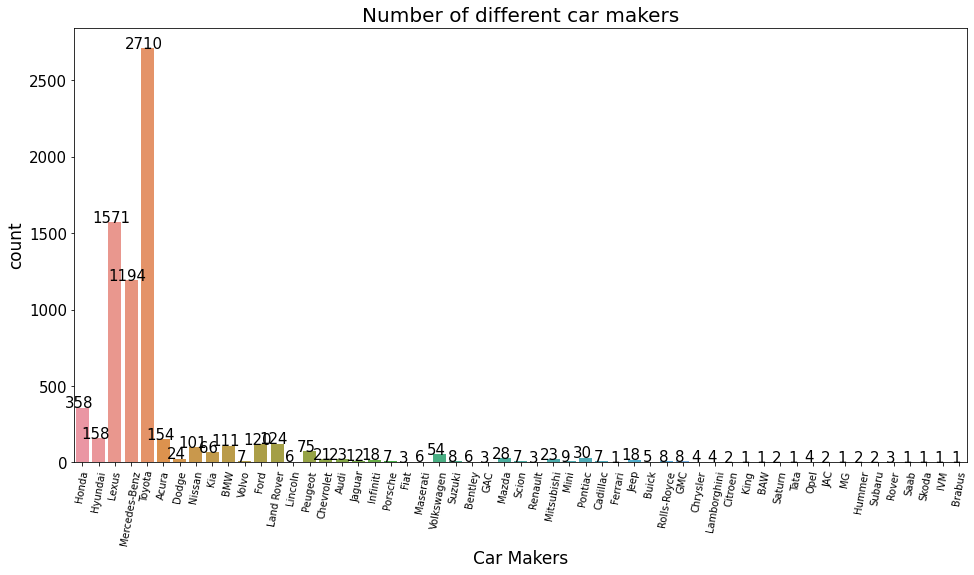

In [53]:
plt.figure(figsize = (16,8))
ax=sns.countplot(x = "Maker", data = df_train)
ax.set_title("Number of different car makers", fontsize = 20)
plt.xlabel("Car Makers",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.yticks(size=15)
plt.xticks(size=10, rotation=80)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

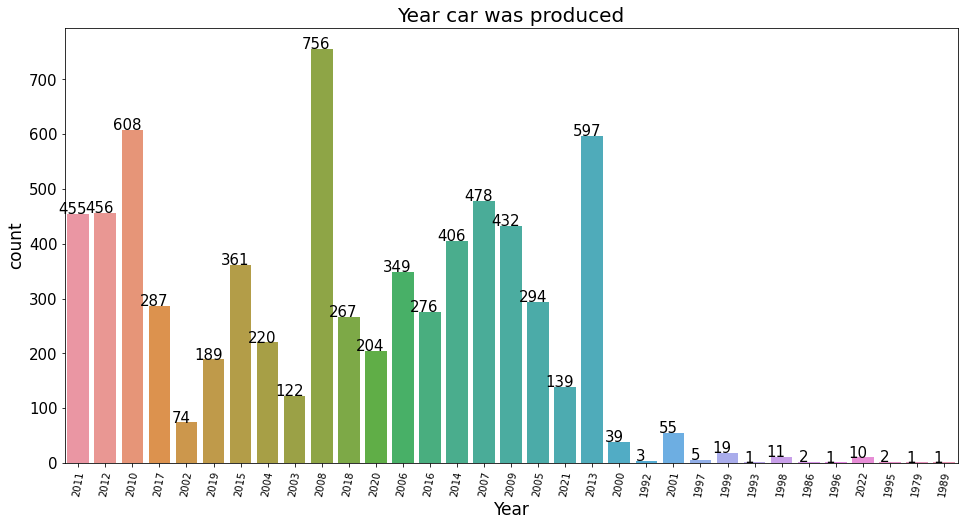

In [54]:
plt.figure(figsize = (16,8))
ax=sns.countplot(x = "Year", data = df_train)
ax.set_title("Year car was produced", fontsize = 20)
plt.xlabel("Year",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.yticks(size=15)
plt.xticks(size=10, rotation=80)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

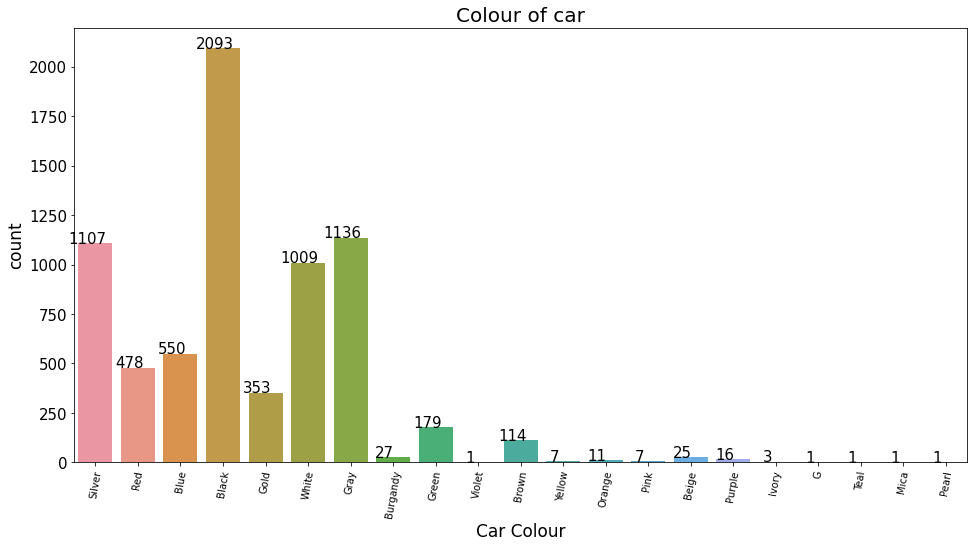

In [55]:
plt.figure(figsize = (16,8))
ax=sns.countplot(x = "Colour", data = df_train)
ax.set_title("Colour of car", fontsize = 20)
plt.xlabel("Car Colour",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.yticks(size=15)
plt.xticks(size=10, rotation=80)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

In [56]:
# Seperate the features from the target variable
X = df_train.drop(["Amount (Million Naira)"], axis = 1)
Y = df_train["Amount (Million Naira)"]

In [57]:
X.head()

,Location,Maker,Year,Colour,Type,Distance
0,Abuja,Honda,2011,Silver,Nigerian Used,103198.903612
1,Ibadan,Hyundai,2012,Silver,Nigerian Used,125000.000000
2,Lagos,Lexus,2010,Red,Foreign Used,110852.000000
3,Abuja,Mercedes-Benz,2017,Blue,Foreign Used,30000.000000
4,Ibadan,Toyota,2002,Red,Nigerian Used,125206.000000


In [58]:
Y.head()

0     2.2
1     3.5
2     9.2
3    22.8
4     2.6
Name: Amount (Million Naira), dtype: float64

In [59]:
#Import preprocessing module
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Create a function to preprocess our data sets
def preprocess_data(data):
    cat_features = ["Location","Maker","Year","Colour","Type"] # Categorical data to encode using one hot encoding
    data = pd.get_dummies(data, prefix_sep= "_", columns = cat_features)
    scaler = MinMaxScaler(feature_range = (0,1))
    data = scaler.fit_transform(data)
    return data

In [61]:
prep_train = preprocess_data(X)
prep_test = preprocess_data(df_test)

In [63]:
# Split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(prep_train,Y, test_size = 0.3, random_state = 42)

In [64]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [65]:
pred = reg.predict(X_test)

In [66]:
pred

array([ 6.1953125 , 28.11328125,  0.47265625, ...,  9.08203125,
       25.31640625, 71.61328125])

In [74]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)

In [75]:
mse

1.5848257195870942e+25

In [76]:
from math import sqrt

In [77]:
rmse =sqrt(mse)

In [78]:
rmse

3980986962534.6606

In [79]:
from sklearn.metrics import mean_absolute_error

# we are using mean_absolute_error because 
# this is a regression model

y_pred = reg.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))

MAE 146713801945.13318


In [80]:
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor(max_depth=2)
decision_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [81]:
y_pred = decision_reg.predict(X_test)

In [82]:
y_pred

array([ 9.28535891,  9.28535891,  9.28535891, ...,  9.28535891,
        9.28535891, 68.20854962])

In [85]:
mse2 = mean_squared_error(y_test, y_pred)

In [86]:
mse

432.9178546465548

In [87]:
rmse2 = sqrt(mse)

In [88]:
rmse2

20.806678126182344

In [112]:
prediction1 = decision_reg.predict(prep_test)

ValueError: X has 94 features, but DecisionTreeRegressor is expecting 116 features as input.

In [94]:
from sklearn.svm import SVR
svr_pred = SVR()
svr_pred.fit(X_train, y_train)

SVR()

In [95]:
y_pred1 = svr_pred.predict(X_test)

In [96]:
y_pred1

array([ 7.43621833, 15.47593631,  2.47239826, ...,  5.72127774,
       21.55136089, 23.50800853])

In [98]:
mse3 = mean_squared_error(y_test, y_pred1)
mse3

623.9880160106685

In [99]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [100]:
y_pred2 = lassoReg.predict(X_test)

In [102]:
mse4 = mean_squared_error(y_test, y_pred2)
mse4

361.09632017889777

In [103]:
rmse4 = sqrt(mse4)
rmse4

19.00253457249579

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X_train, y_train = make_regression(n_features=116, n_informative=2, random_state=0, shuffle=False)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [107]:
y_pred3 = rfr.predict(X_test)


In [108]:
mse4 = mean_squared_error(y_test, y_pred3)
mse4

1192.9831830151732

In [110]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
pred4 = xgb_r.predict(X_test)
mse5 = mean_squared_error(y_test, y_pred3)
# RMSE Computation
rmse = np.sqrt(mse5)
print("RMSE : % f" %(rmse))

[22:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  34.539589


In [114]:
prediction = svr_pred.predict(prep_test.transform(prep_test))

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

# Feature Engineering


### 1.Feature Encoding